## TORCH.NN 이 실제로 무엇인가요?([원문 링크](https://tutorials.pytorch.kr/beginner/nn_tutorial.html#nn-sequential))

모두연 AI 2024 코칭스터디 과정 중 진행했던 팀미션(로롱코칭_6팀)으로 진행했던 내용

**실습 예제 커스텀 개요**
- 원문의 내용이 구체적으로 잘 나와있었지만 문과 입장에서 전체적인 그림과 각 단계별 전후관계에 대한 차이가 명확히 와닿지 않아.. 요목조목 잘게 나눠 설명한 부분이 오히려 더 큰 허들로 다가왔다. 나눠진 각 요소를 어떻게 붙여야 온전한 하나의 코드가 될 수 있는지도 감이 잡히지 않았다.
- 내용이 길어지더라도, 각 단계별 온전한 프로세스를 갖추고나서 각 단계별 결과값과 절차, 코드의 길이, 실행 순서, 손실값 그리고 모델의 형태를 먼저 조망해 볼 수 있도록 실습 내용을 재구성해보았다.


- 기여자 : @서진형 @엔터6_리더(변찬우) @Shinar(신애라)

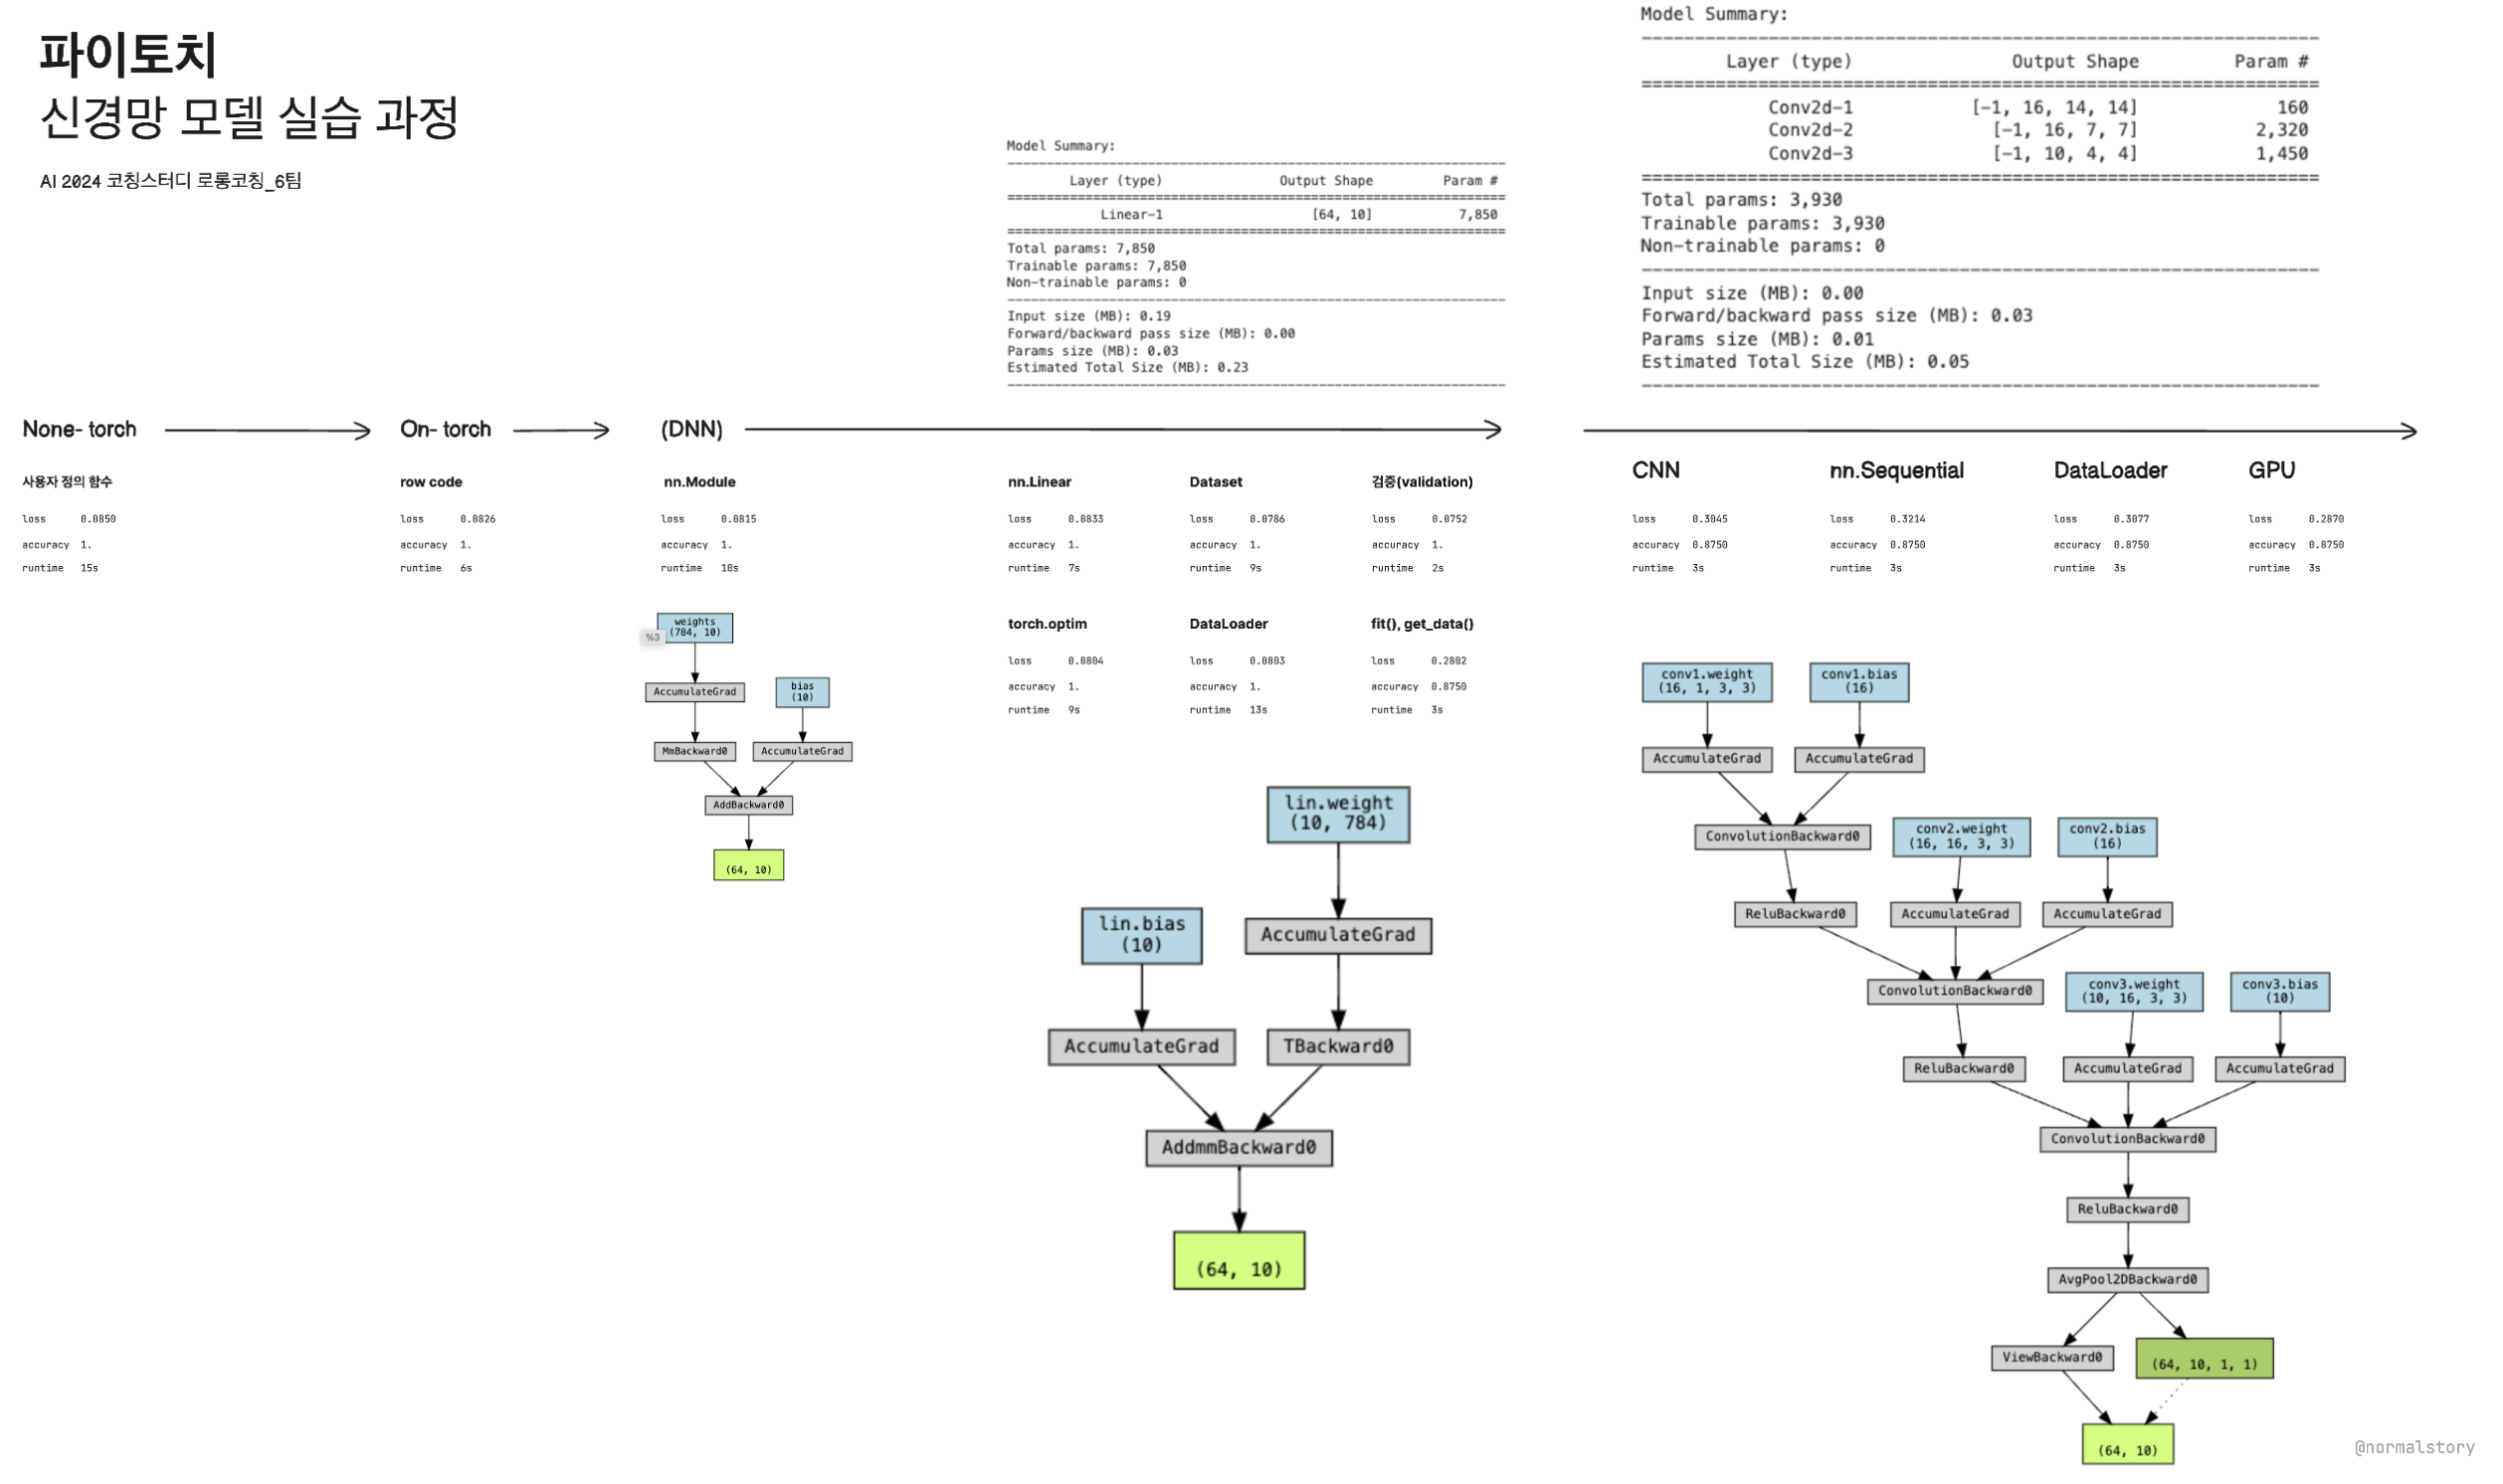

- 그래프 원본 : https://app.eraser.io/workspace/44v5X1UNVWVul9yTSrAl

In [ ]:
# 패키지 추가 설치
pip install torch-summary # 모델 요약
pip install torchviz # 모델 시각화

## torch.nn **'없이',** 신경망 만들기

In [ ]:
import requests
import pickle
import gzip
import torch
from pathlib import Path
from matplotlib import pyplot

import math

# 데이터 다운로드 및 압축 해제
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터셋 로드
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

# Numpy 배열을 Torch 텐서로 변환
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 가중치와 편향 초기화
weights = torch.randn(784, 10) / math.sqrt(784)  #가중치는 '표준화된' 랜덤값
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True) # 편향은 0

def accuracy(out, yb):
    preds = torch.argmax(out, dim=1) #네트워크의 출력에서 가장 확률이 높은 인덱스를 선택
    return (preds == yb).float().mean() #실제 목표 값과 비교하여 정확도를 계산

#--------  torch "없이" 부분 (start)  --------#
# 직접 활성화 함수와 모델 함수 정의
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias) # 입력 데이터(xb)를 가중치와 편향을 이용
#--------  torch "없이" 부분 (end)  --------#

bs = 64  # 배치 크기

xb = x_train[0:bs]  # x로부터 미니배치(mini-batch) 추출
preds = model(xb)  # 예측
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.9053, -2.5441, -2.2081, -2.2364, -2.0958, -2.4549, -2.4343, -2.1986,
        -2.1477, -2.0734], grad_fn=<SelectBackward0>) torch.Size([64, 10])


In [ ]:
import requests
import pickle
import gzip
from pathlib import Path
from matplotlib import pyplot

import torch
import math

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

#--------  torch "없이" 부분 (start)  --------#
# 표준 Python으로 역전파 구현(NegBackward : negative log-likelihood)손실 함수와 정확도 함수 정의
def nll(input, target):
    return -input[range(target.shape[0]), target].mean() #예측 값과 실제 목표 값 사이의 손실을 계산

loss_func = nll
#--------  torch "없이" 부분 (end)  --------#

yb = y_train[0:bs]
print("무작위 모델에 대한 손실(loss) :",loss_func(preds, yb), "\n마지막 배치의 정확도(accuracy) :", accuracy(model(xb), yb))

무작위 모델에 대한 손실(loss) : tensor(2.3576, grad_fn=<NegBackward0>) 
마지막 배치의 정확도(accuracy) : tensor(0.1250)


In [ ]:
import requests
import pickle
import gzip
import math
from pathlib import Path
from matplotlib import pyplot

import torch

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

#--------  torch "없이" 부분 (start)  --------#
# 훈련 루프(training loop)를 실행
n,c = x_train.shape
bs = 64  # 데이터의 미니배치를 선택 (bs 크기)

lr = 0.5  # 학습률(learning rate)
epochs = 2  # 훈련에 사용할 에폭(epoch) 수

loss_func = nll

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):

        # set_trace()
        start_i = i * bs
        end_i = start_i + bs

        xb = x_train[start_i:end_i] #x로부터 미니배치(mini-batch) 추출
        yb = y_train[start_i:end_i]

        pred = model(xb) # 모델을 이용하여 예측 수행
        loss = loss_func(pred, yb)

        # 경사 하강법 Gradient Descent, 모델의 기울기(weights, bias) 업데이트
        loss.backward()

        with torch.no_grad():
            # 그래디언트로 가중치(weights)와 편향(bias)를 갱신
            weights -= weights.grad * lr
            bias -= bias.grad * lr

            # 갱신이 후에는 그래디언트를 0으로 초기화
            weights.grad.zero_()
            bias.grad.zero_()
#--------  torch "없이" 부분 (start)  --------#

print("마지막 배치의 손실(loss) :", loss_func(model(xb), yb), "\n마지막 배치의 정확도(accuracy) :", accuracy(model(xb), yb))

마지막 배치의 손실(loss) : tensor(0.0811, grad_fn=<NegBackward0>) 
마지막 배치의 정확도(accuracy) : tensor(1.)


> loss.backward() # 역전파를 수행하기 위해 호출
- 손실 텐서에 연결된 그래디언트 함수를 통해 역전파를 시작합니다. 이는 PyTorch의 자동 미분 시스템의 일부로 활성화된 모든 텐서의 연산에 대한 그래디언트를 계산합니다.
- 그래디언트 계산이 수행되고 난 후, 이 그래디언트 정보는 weights.grad와 bias.grad에서 액세스됩니다. 이 그래디언트 정보는 가중치 업데이트에 사용됩니다.
- 그래디언트로 가중치(weights)와 바이어스(bias)를 갱신하며, 갱신이 후에는 그래디언트를 0으로 초기화






 > 직접 계산하는 log-softmax 모델 정의, 사용자 정의 손실함수 사용
 - **def log_softmax**(x):
    return ...
 - **def model**(xb):
    return ...
 - **def loss_func**(input, target):
    return ...

## torch.nn **'있이',** 신경망 만들기

> #### **기초 텐서 연산으로 신경망 만들기**
> - **주요 라이브러리**: torch
> - **특징**: 기본 텐서 연산을 사용해 신경망을 처음부터 구현.
> - **개선 사항**: PyTorch 텐서의 기본 기능을 이해하고, 기울기 계산과 역전파 과정을 수동으로 구현.

In [ ]:
import requests
import pickle
import gzip
import math
from pathlib import Path
from matplotlib import pyplot

import torch

# 데이터 경로 설정 및 다운로드
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

# MNIST 데이터 다운로드
if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 가중치(Weights) 및 편향(Bias)을 초기화
weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

# 정확도 계산 함수
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

# 데이터 및 학습 설정
n,c = x_train.shape
bs = 64
lr = 0.5
epochs = 2

#--------  torch "있이" 부분 (start)  --------#
import torch.nn.functional as F

#교차 엔트로피(Cross-Entropy) 손실 함수 선언 : 분류 문제에서 사용됨
loss_func = F.cross_entropy

# 신경망 모델을 정의
def model(xb): #입력 xb을 받아 예측 출력을 반환
    return xb @ weights + bias # 파이토치의 텐서(Tensor) 연산을 사용하여 신경망의 출력을 계산: 입력 xb(2차원 텐서)과 모델의 가중치(2차원 텐서)를 행렬곱셈(matrix multiplication)으로 수행
#--------  torch "있이" 부분 (end)  --------#

# 학습 과정
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs

        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]

        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr

            weights.grad.zero_()
            bias.grad.zero_()

# 마지막 배치의 손실과 정확도 출력
print("\n - 마지막 배치의 손실(loss) :", loss_func(model(xb), yb), "\n마지막 배치의 정확도(accuracy) :", accuracy(model(xb), yb))

마지막 배치의 손실(loss) : tensor(0.0775, grad_fn=<NllLossBackward0>) 
마지막 배치의 정확도(accuracy) : tensor(1.)


## 리팩토링 case.1 - nn.Module

> #### **nn.Module 사용**
> - **주요 라이브러리**: torch.nn
> - **특징**: nn.Module을 상속하여 모델의 구조를 정의하고 관리.
> - **개선 사항**: 가중치와 편향을 자동으로 초기화 및 관리, 코드 간결화.


- 함수 대신 클래스(오브젝트, object)사용 -> 모델을 인스턴스화(instantiate)
- 가중치(weights)와 편향(bias) 갱신, 갱신 후 초기화(0)하는 과정을 nn.Module 내장 함수로 처리


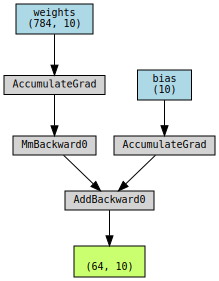


 - 마지막 배치의 손실(loss) : tensor(0.2304, grad_fn=<NllLossBackward0>) 
 - 마지막 배치의 정확도(accuracy) : tensor(0.9219)


In [ ]:
import requests
import pickle
import gzip
import math
from pathlib import Path
from matplotlib import pyplot

import torch
import torch.nn.functional as F

# 데이터 경로 설정 및 다운로드
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

# MNIST 데이터 다운로드
if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# weights = torch.randn(784, 10) / math.sqrt(784)
# weights.requires_grad_()
# bias = torch.zeros(10, requires_grad=True)

# 정확도 계산 함수
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

#--------  리팩토링1 (start)  --------#
from torch import nn
# 모델 정의(가중치와 편향을 직접 정의)
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias
#--------  리팩토링1 (end)  --------#

# 데이터 및 학습 설정
n,c = x_train.shape
bs = 64
lr = 0.5
epochs = 2
loss_func = F.cross_entropy

# 모델 초기화
model = Mnist_Logistic() #함수 대신 클래스(오브젝트)사용 : 모델을 인스턴스화(instantiate)  <--------

# 학습 과정
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]

        # 예측 및 손실 계산
        pred = model(xb)
        loss = loss_func(pred, yb)

        # 역전파 및 가중치 업데이트
        loss.backward()
        with torch.no_grad():
          #--------  리팩토링2 (start)  --------#
            for p in model.parameters():
                p -= p.grad * lr
            model.zero_grad()
          #--------  리팩토링2 (start)  --------#

# **모델 시각화
from torchviz import make_dot
xb, yb = next(iter(train_dl))
out = model(xb)
#make_dot(out, params=dict(list(model.named_parameters()))).render("model11_gpu", format="png")
dot = make_dot(out, params=dict(list(model.named_parameters())))
display(dot)

# 마지막 배치의 손실과 정확도 출력
print("\n - 마지막 배치의 손실(loss) :", loss_func(model(xb), yb), "\n - 마지막 배치의 정확도(accuracy) :", accuracy(model(xb), yb))

## 리팩토링 case.2 - nn.Linear

> #### **nn.Linear 사용**
> - **주요 라이브러리**: torch.nn
> - **특징**: 선형 레이어를 정의하고 초기화하는 nn.Linear 사용.
> - **개선 사항**: 수동 가중치 초기화 제거, 선형 변환 코드 간소화.


Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [64, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.23
----------------------------------------------------------------


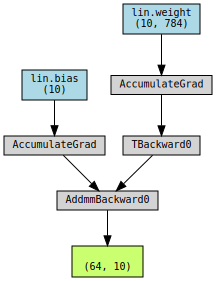


 - 마지막 배치의 손실(loss) : tensor(0.2251, grad_fn=<NllLossBackward0>) 
마지막 배치의 정확도(accuracy) : tensor(0.9531)


In [ ]:
import requests
import pickle
import gzip
import math
from pathlib import Path
from matplotlib import pyplot

import torch
import torch.nn.functional as F
from torch import nn

# 데이터 경로 설정 및 다운로드
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

# MNIST 데이터 다운로드
if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 정확도 계산 함수
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

#--------  리팩토링 (start)  --------#
# 모델 정의(nn.Linear를 사용하여 가중치와 편향을 자동으로 생성)
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)
#--------  리팩토링 (end)  --------#

# 데이터 및 학습 설정
n,c = x_train.shape
bs = 64
lr = 0.5
epochs = 2
loss_func = F.cross_entropy

# 모델 초기화
model = Mnist_Logistic()

# 학습 과정
for epoch in range(epochs):
  for i in range((n - 1) // bs + 1):
      start_i = i * bs
      end_i = start_i + bs
      xb = x_train[start_i:end_i]
      yb = y_train[start_i:end_i]

      # 예측 및 손실 계산
      pred = model(xb)
      loss = loss_func(pred, yb)

      # 역전파 및 가중치 업데이트
      loss.backward()
      with torch.no_grad():
          for p in model.parameters():
              p -= p.grad * lr
          model.zero_grad()

# **모델 요약(torchsummary)
from torchsummary import summary

print("Model Summary:")
summary(model, input_size=(784,), batch_size=64, device="cpu")

# **모델 시각화
from torchviz import make_dot
xb, yb = next(iter(train_dl))
out = model(xb)
#make_dot(out, params=dict(list(model.named_parameters()))).render("model11_gpu", format="png")
dot = make_dot(out, params=dict(list(model.named_parameters())))
display(dot)

# 마지막 배치의 손실과 정확도 출력
print("\n - 마지막 배치의 손실(loss) :", loss_func(model(xb), yb), "\n마지막 배치의 정확도(accuracy) :", accuracy(model(xb), yb))


## 리팩토링 case.3 - torch.optim

> #### **최적화 과정 단순화**
> - **주요 라이브러리**: torch.optim
> - **특징**: torch.optim을 통해 최적화 알고리즘 사용.
> - **개선 사항**: 매개변수 업데이트 과정 자동화, 최적화 코드 간소화.

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [64, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.23
----------------------------------------------------------------


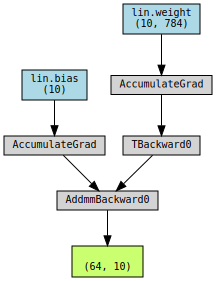


 - 마지막 배치의 손실(loss) : tensor(0.2281, grad_fn=<NllLossBackward0>) 
마지막 배치의 정확도(accuracy) : tensor(0.9531)


In [ ]:
import requests
import pickle
import gzip
import math
from pathlib import Path
from matplotlib import pyplot

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim

# 데이터 경로 설정 및 다운로드
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 정확도 계산 함수
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

# 모델 정의
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

# 배치 사이즈, 학습률, 에폭 설정
n,c = x_train.shape
bs = 64
lr = 0.5
epochs = 2
loss_func = F.cross_entropy

#--------  리팩토링1 (start)  --------#
from torch import optim

# 모델과 옵티마이저를 생성하는 함수
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)

# 모델과 옵티마이저 생성
model, opt = get_model() #<------
#--------  리팩토링1 (end)  --------#

# 모델 학습 및 검증
for epoch in range(epochs):
  for i in range((n - 1) // bs + 1):
      start_i = i * bs
      end_i = start_i + bs
      xb = x_train[start_i:end_i]
      yb = y_train[start_i:end_i]

      # 예측 및 손실 계산
      pred = model(xb)
      loss = loss_func(pred, yb)

      # 역전파 및 가중치 업데이트
      loss.backward()
      #--------  리팩토링2 (start)  --------#
      opt.step()
      opt.zero_grad()
      #--------  리팩토링2 (end)  --------#

# **모델 요약(torchsummary)
from torchsummary import summary

print("Model Summary:")
summary(model, input_size=(784,), batch_size=64, device="cpu")

# **모델 시각화
from torchviz import make_dot
xb, yb = next(iter(train_dl))
out = model(xb)
#make_dot(out, params=dict(list(model.named_parameters()))).render("model11_gpu", format="png")
dot = make_dot(out, params=dict(list(model.named_parameters())))
display(dot)

print("\n - 마지막 배치의 손실(loss) :", loss_func(model(xb), yb), "\n마지막 배치의 정확도(accuracy) :", accuracy(model(xb), yb))

## 리팩토링 case.4 - Dataset

> #### **Dataset과 DataLoader 사용**
> - **주요 라이브러리**: torch.utils.data
> - **특징**: Dataset과 DataLoader를 활용하여 데이터 배치를 관리.
> - **개선 사항**: 데이터 로딩과 배치 처리를 자동화, 훈련 효율성 증가.

> PyTorch 에는 추상 Dataset 클래스가 있습니다.
- Dataset 은 __len__ 함수 (Python의 표준 len 함수에 의해 호출됨) 및 __getitem__ 함수를 가진 어떤 것이라도 될 수 있으며, 이 함수들을 인덱싱(indexing)하기 위한 방법으로 사용합니다
- PyTorch 의TensorDataset은 텐서를 감싸는(wrapping) Dataset 입니다.
- 길이와 인덱싱 방식을 정의함으로써 텐서의 첫 번째 차원을 따라 반복, 인덱싱 및 슬라이스(slice)하는 방법도 제공합니다.
- 이렇게하면 훈련 할 때 동일한 라인에서 독립(independent) 변수와 종속(dependent) 변수에 쉽게 액세스 할 수 있습니다.


Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [64, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.23
----------------------------------------------------------------


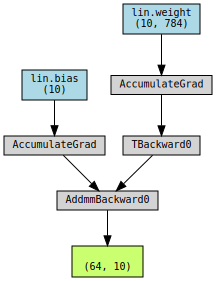


 - 마지막 배치의 손실(loss) : tensor(0.2285, grad_fn=<NllLossBackward0>) 
마지막 배치의 정확도(accuracy) : tensor(0.9531)


In [ ]:
import requests
import pickle
import gzip
import math
from pathlib import Path
from matplotlib import pyplot

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim

# 데이터 경로 설정 및 다운로드
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 배치의 정확도 함수
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

# 모델 정의
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

# 배치 사이즈, 학습률, 에폭 설정
n,c = x_train.shape
bs = 64
lr = 0.5
epochs = 2
loss_func = F.cross_entropy

# 모델과 옵티마이저를 생성하는 함수
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)

# 모델과 옵티마이저 생성
model, opt = get_model()

#--------  리팩토링1 (start)  --------#
# 학습 데이터셋 생성
from torch.utils.data import TensorDataset
train_ds = TensorDataset(x_train, y_train)
#--------  리팩토링1 (end)  --------#

# 모델 학습 및 검증
for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #--------  리팩토링2 (start)  --------#
        xb, yb = train_ds[i * bs: i * bs + bs]
        #--------  리팩토링2 (end)  --------#
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

# 모델 요약 (torchsummary)
from torchsummary import summary

print("Model Summary:")
summary(model, input_size=(784,), batch_size=64, device="cpu")

# **모델 시각화
from torchviz import make_dot
xb, yb = next(iter(train_dl))
out = model(xb)
#make_dot(out, params=dict(list(model.named_parameters()))).render("model11_gpu", format="png")
dot = make_dot(out, params=dict(list(model.named_parameters())))
display(dot)

print("\n - 마지막 배치의 손실(loss) :", loss_func(model(xb), yb), "\n마지막 배치의 정확도(accuracy) :", accuracy(model(xb), yb))

## 리팩토링 case.5 - DataLoader

> #### **Dataset과 DataLoader 사용**
> - **주요 라이브러리**: torch.utils.data
> - **특징**: Dataset과 DataLoader를 활용하여 데이터 배치를 관리.
> - **개선 사항**: 데이터 로딩과 배치 처리를 자동화, 훈련 효율성 증가.

> 배치들에 대해서 반복하기 쉽게 만들어준다

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [64, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.23
----------------------------------------------------------------


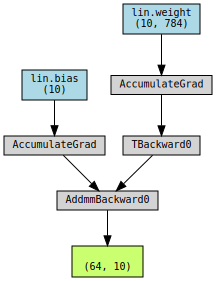


 - 마지막 배치의 손실(loss) : tensor(0.2263, grad_fn=<NllLossBackward0>) 
마지막 배치의 정확도(accuracy) : tensor(0.9531)


In [ ]:
import requests
import pickle
import gzip
import math
from pathlib import Path
from matplotlib import pyplot

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim

# 데이터 경로 설정 및 다운로드
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 배치의 정확도 함수
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

# def accuracy(out, yb):
#     preds = torch.argmax(out, dim=1)
#     return (preds == yb).float().mean()

# 모델 정의
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

# 배치 사이즈, 학습률, 에폭 설정
# n,c = x_train.shape #<-----
bs = 64
lr = 0.5
epochs = 2
loss_func = F.cross_entropy

# 모델과 옵티마이저를 생성하는 함수
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)

# 모델과 옵티마이저 생성
model, opt = get_model()

# 학습 데이터셋 생성
from torch.utils.data import TensorDataset
train_ds = TensorDataset(x_train, y_train)

# 데이터로더 생성
#--------  리팩토링1 (start)  --------#
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=bs)
#--------  리팩토링1 (end)  --------#

# 모델 학습 및 검증
for epoch in range(epochs):
    #--------  리팩토링2 (start)  --------#
    for xb, yb in train_dl:
    #--------  리팩토링2 (end)  --------#

        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

# **모델 요약(torchsummary)
from torchsummary import summary

print("Model Summary:")
summary(model, input_size=(784,), batch_size=64, device="cpu")

# **모델 시각화
from torchviz import make_dot
xb, yb = next(iter(train_dl))
out = model(xb)
#make_dot(out, params=dict(list(model.named_parameters()))).render("model11_gpu", format="png")
dot = make_dot(out, params=dict(list(model.named_parameters())))
display(dot)

print("\n - 마지막 배치의 손실(loss) :", loss_func(model(xb), yb), "\n마지막 배치의 정확도(accuracy) :", accuracy(model(xb), yb))


## 검증(validation) 추가하기

> 그동안 배치 `정확도(accuracy) : tensor(1.)` 이었었는데. 이것은 사실상 오버피팅에 가깝다고 추정할 수 있다. 이에 데이터를 훈련데이터와 검증 데이터셋으로 나눠서 학습하도록 하는 절차를 추가하도록 한다.

> 실전에서, 여러분들은 과적합(overfitting)을 확인하기 위해서 항상 검증 데이터셋(validation set) 이 있어야 합니다.
- 훈련 데이터를 섞는(shuffling) 것은 배치와 과적합 사이의 상관관계를 방지하기 위해 중요합니다. 반면에, 검증 손실(validation loss)은 검증 데이터셋을 섞든 안섞든 동일합니다. 데이터를 섞는 것은 추가 시간이 걸리므로, 검증 데이터를 섞는 것은 의미가 없습니다.
- 검증 데이터셋에 대한 배치 크기는 학습 데이터셋 배치 크기의 2배를 사용할 것입니다. 이는 검증 데이터셋에 대해서는 역전파(backpropagation)가 필요하지 않으므로 메모리를 덜 사용하기 때문입니다 (기울기를 저장할 필요가 없음). 더 큰 배치 크기를 사용하여 손실을 더 빨리 계산하기 위해 이렇게 합니다.


 - 모든 데이터셋 학습 횟수(epoch) : 0 당, 손실(loss) : tensor(0.2891)

 - 모든 데이터셋 학습 횟수(epoch) : 1 당, 손실(loss) : tensor(0.2877)


 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [64, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.23
----------------------------------------------------------------


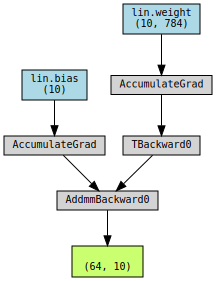

In [ ]:
import requests
import pickle
import gzip
import math
from pathlib import Path
from matplotlib import pyplot

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# 데이터 경로 설정 및 다운로드
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 모델 정의
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

# 배치 사이즈, 학습률, 에폭 설정
bs = 64
lr = 0.5
epochs = 2
loss_func = F.cross_entropy

# 모델과 옵티마이저를 생성하는 함수
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)

# 모델과 옵티마이저 생성
model, opt = get_model()

#--------  리팩토링1 (start)  --------#
# 학습 데이터셋과 데이터로더 생성
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size = bs, shuffle=True)

#검증 데이터셋과 데이터로더 생성
valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size = bs * 2) #학습 데이터셋 배치 크기의 2배를 사용 for. 1)역전파(backpropagation)가 필요하지 않아 메모리를 덜 사용(기울기 저장x). 2)더 큰 배치 크기를 사용하여 손실을 더 빨리 계산
#--------  리팩토링1 (end)  --------#

# 모델 학습 및 검증
for epoch in range(epochs):
  model.train()  #< -------- 모델을 학습 모드로 설정

  # 학습 과정
  for xb, yb in train_dl:
      pred = model(xb)
      loss = loss_func(pred, yb)

      loss.backward()
      opt.step()
      opt.zero_grad()

  #--------  리팩토링2 (start)  --------#
  #검증 과정
  model.eval() #< -------- 모델을 평가 모드로 설정
  with torch.no_grad():
      valid_loss = sum(loss_func(model(xb), yb) for xb, yb in valid_dl)

  # 훈련과정 전체에 대한 모델의 평균 손실과 정확도를 출력
  print("\n - 모든 데이터셋 학습 횟수(epoch) :",epoch, "당, 손실(loss) :", valid_loss / len(valid_dl))
  #--------  리팩토링2 (end)  --------#

# 마지막 배치의 손실과 정확도는 특정(훈련 데이터) 배치에 대한 모델의 성능만을 표시하기 때문에, 모델의 전체적인 성능을 측정하는 데는 부적합할 수 있다
# print("마지막 배치의 손실(loss) :", loss_func(model(xb), yb), "\n마지막 배치의 정확도(accuracy) :", accuracy(model(xb), yb))

# **모델 요약(torchsummary)
from torchsummary import summary

print("\n\n Model Summary:")
summary(model, input_size=(784,), batch_size=64, device="cpu")

# **모델 시각화
from torchviz import make_dot

xb, yb = next(iter(train_dl))
out = model(xb)
#make_dot(out, params=dict(list(model.named_parameters()))).render("model11_gpu", format="png")
dot = make_dot(out, params=dict(list(model.named_parameters())))
display(dot)


## 리팩토링 case.6 - fit() 와 get_data() 생성

> 반복 프로세스 개선 훈련
- 데이터셋과 검증 데이터셋 모두에 대한 손실을 계산하는 유사한 프로세스를 두 번 거치므로,
이를 하나의 배치에 대한 손실을 계산하는 자체 함수 ``loss_batch`` 로 만들어보겠습니다.
- 훈련 데이터셋에 대한 옵티마이저를 전달하고 이를 사용하여 역전파를 수행합니다.
검증 데이터셋의 경우 옵티마이저를 전달하지 않으므로 메소드가 역전파를 수행하지 않습니다.

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [64, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.23
----------------------------------------------------------------


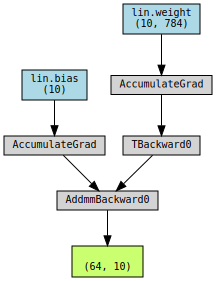


 - 모든 데이터셋 학습 횟수(epoch) : 0 일때, 손실(loss) : 0.32876233093738555

 - 모든 데이터셋 학습 횟수(epoch) : 1 일때, 손실(loss) : 0.2761433190345764


In [ ]:
import requests
import pickle
import gzip
import numpy as np
import math
from pathlib import Path
from matplotlib import pyplot

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# 데이터 경로 설정 및 다운로드
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 모델 정의
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

# 배치 사이즈, 학습률, 에폭 설정
bs = 64
lr = 0.5
epochs = 2
loss_func = F.cross_entropy

# 모델과 옵티마이저를 생성하는 함수
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)

# 데이터셋 생성
train_ds = TensorDataset(x_train, y_train)
# train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)
valid_ds = TensorDataset(x_valid, y_valid)
# valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

#--------  리팩토링 (start)  --------#
# 학습 및 검증 데이터셋에 대한 데이터로더 생성 함수
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

#하나의 배치에 대한 손실을 계산하는 자체 함수
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

#모델을 훈련하고 각 에폭에 대한 훈련 및 검증 손실을 계산하는 작업을 수행
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):

    for epoch in range(epochs):
      model.train()
      for xb, yb in train_dl:
          loss_batch(model, loss_func, xb, yb, opt)  # <---

      model.eval()
      with torch.no_grad():
          losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
          )
      val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
      print("\n - 모든 데이터셋 학습 횟수(epoch) :",epoch, "일때, 손실(loss) :", val_loss)


#이제 dataloader를 가져오고 모델을 훈련하는 전체 프로세스를 3 줄의 코드로 실행
# 데이터로더 준비
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)

# 모델과 옵티마이저 생성
model, opt = get_model()

# **모델 요약(torchsummary)
from torchsummary import summary

print("Model Summary:")
summary(model, input_size=(784,), batch_size=64, device="cpu")

# **모델 시각화
from torchviz import make_dot

xb, yb = next(iter(train_dl))
out = model(xb)
#make_dot(out, params=dict(list(model.named_parameters()))).render("model11_gpu", format="png")
dot = make_dot(out, params=dict(list(model.named_parameters())))
display(dot)

# 모델 학습
fit(epochs, model, loss_func, opt, train_dl, valid_dl)
#--------  리팩토링 (end)  --------#

## CNN 으로 넘어가기

> #### **CNN으로 확장**
> - **주요 라이브러리**: torch.nn
> - **특징**: 컨볼루션 레이어를 사용하여 신경망 확장.
> - **개선 사항**: 복잡한 이미지 데이터를 처리할 수 있는 모델 구현.

> 3개의 컨볼루션 레이어로 신경망을 구축할 것입니다.
- 이전 섹션의 어떤 함수도 모델의 형식에 대해 가정하지 않기 때문에, 별도의 수정없이 CNN을 학습하는 데 사용할 수 있습니다.
- Pytorch의 사전정의된 Conv2d 클래스를 컨볼루션 레이어로 사용합니다. 3개의 컨볼루션 레이어로 CNN을 정의합니다. 각 컨볼루션 뒤에는 ReLU가 있습니다.
- 마지막으로 평균 풀링(average pooling)을 수행합니다. (view 는 PyTorch의 NumPy reshape 버전입니다.)

> 모멘텀(Momentum) 은 이전 업데이트도 고려하고 일반적으로 더 빠른 훈련으로 이어지는 확률적 경사하강법(stochastic gradient descent) 의 변형입니다.

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 14, 14]             160
            Conv2d-2             [-1, 16, 7, 7]           2,320
            Conv2d-3             [-1, 10, 4, 4]           1,450
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 0.01
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


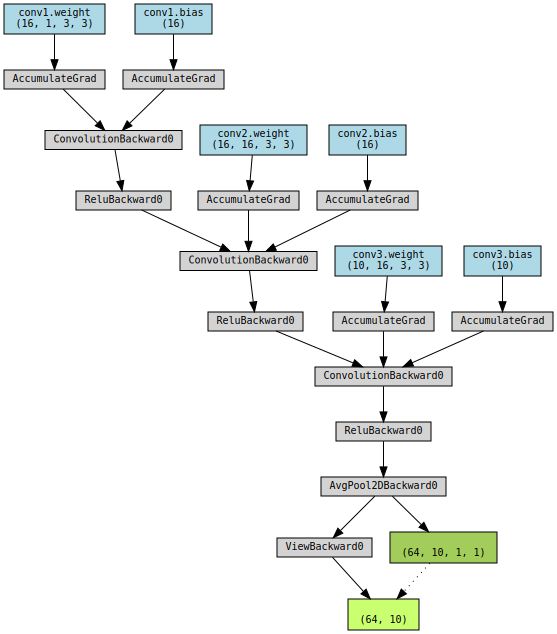


 - 모든 데이터셋 학습 횟수(epoch) : 0 일때, 손실(loss) : 0.35710100734233857

 - 모든 데이터셋 학습 횟수(epoch) : 1 일때, 손실(loss) : 0.26313805844783783


In [ ]:
import requests
import pickle
import gzip
import numpy as np
import math
from pathlib import Path
from matplotlib import pyplot

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# 데이터 경로 설정 및 다운로드
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 배치 사이즈, 학습률, 에폭 설정
bs = 64
lr = 0.1 #<--------
epochs = 2
loss_func = F.cross_entropy

# 모델과 옵티마이저를 생성하는 함수
# def get_model():
#     model = Mnist_Logistic()
#     return model, optim.SGD(model.parameters(), lr=lr)

# 데이터셋 생성
train_ds = TensorDataset(x_train, y_train)
# train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)
valid_ds = TensorDataset(x_valid, y_valid)
# valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

#--------  cnn (start)  --------#
# 모델 정의 - Pytorch의 Conv2d 클래스를 컨볼루션 레이어로 사용. 3개의 컨볼루션 레이어로 CNN을 정의
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb)) # 각 컨볼루션 뒤에는 ReLU가 있습니다.
        xb = F.avg_pool2d(xb, 4) # 마지막으로 평균 풀링(average pooling)을 수행
        return xb.view(-1, xb.size(1))
#--------  cnn (end)  --------#

# 데이터 로더 생성 함수
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

# 손실 계산 함수
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    return loss.item(), len(xb)

# 모델 학습 함수
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
      model.train()
      for xb, yb in train_dl:
          loss_batch(model, loss_func, xb, yb, opt)

      model.eval()
      with torch.no_grad():
          losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
          )
      val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
      print("\n - 모든 데이터셋 학습 횟수(epoch) :",epoch, "일때, 손실(loss) :", val_loss)

# 데이터 로더 준비
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)

#--------  cnn (start)  --------#
# model, opt = get_model()
# 모델 정의
model = Mnist_CNN()

# 옵티마이저 정의
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)  #모멘텀(Momentum),더 빠른 훈련으로 이어지는 확률적 경사하강법(stochastic gradient descent)의 변형
#--------  cnn (end)  --------#

# **모델 요약(torchsummary)
from torchsummary import summary

print("Model Summary:")
summary(model, input_size=(1, 28, 28), device="cpu")

# **모델 시각화
from torchviz import make_dot

xb, yb = next(iter(train_dl))
out = model(xb)
#make_dot(out, params=dict(list(model.named_parameters()))).render("model11_gpu", format="png")
dot = make_dot(out, params=dict(list(model.named_parameters())))
display(dot)

# 모델 학습
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

## nn.Sequential 사용하기

> torch.nn 에는 코드를 간단히 사용할 수 있는 또 다른 편리한 클래스인 Sequential 이 있습니다.
- Sequential 객체는 그 안에 포함된 각 모듈을 순차적으로 실행합니다. 이것은 우리의 신경망을 작성하는 더 간단한 방법입니다.
- 이를 활용하려면 주어진 함수에서 사용자정의 레이어(custom layer) 를 쉽게 정의할 수 있어야 합니다.
- 예를 들어, PyTorch에는 view 레이어가 없으므로 우리의 신경망 용으로 만들어야 합니다.
- Lambda 는 Sequential 로 신경망을 정의할 때 사용할 수 있는 레이어를 생성할 것입니다.

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Lambda-1            [-1, 1, 28, 28]               0
            Conv2d-2           [-1, 16, 14, 14]             160
              ReLU-3           [-1, 16, 14, 14]               0
            Conv2d-4             [-1, 16, 7, 7]           2,320
              ReLU-5             [-1, 16, 7, 7]               0
            Conv2d-6             [-1, 10, 4, 4]           1,450
              ReLU-7             [-1, 10, 4, 4]               0
         AvgPool2d-8             [-1, 10, 1, 1]               0
            Lambda-9                   [-1, 10]               0
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.07
Params size (MB): 0.01
Estimated Total Size (MB): 0.09
--------------------------------

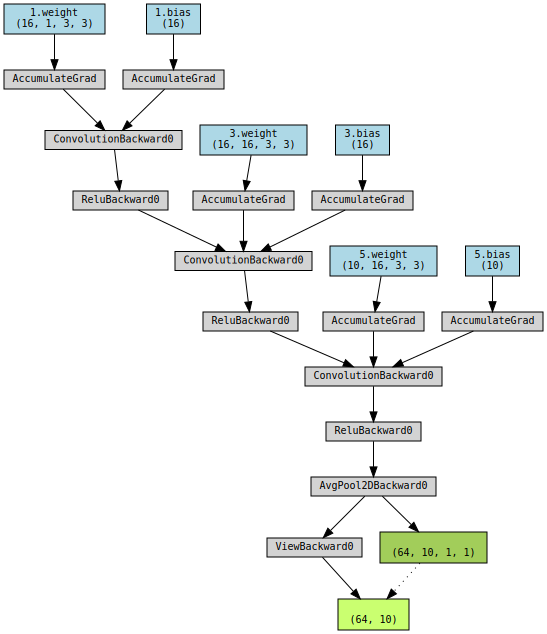


 - 모든 데이터셋 학습 횟수(epoch) : 0 일때, 손실(loss) : 0.41154111161231993

 - 모든 데이터셋 학습 횟수(epoch) : 1 일때, 손실(loss) : 0.2507554977834225


In [ ]:
import requests
import pickle
import gzip
import numpy as np
import math
from pathlib import Path
from matplotlib import pyplot

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# 데이터 경로 설정 및 다운로드
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 배치 사이즈, 학습률, 에폭 설정
bs = 64
lr = 0.1
epochs = 2
loss_func = F.cross_entropy

# 데이터셋 생성
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)

#--------  리팩토링1 (start)  --------#
#사용자 정의 레이어 생성
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

# 데이터 전처리 함수
def preprocess(x):
    return x.view(-1, 1, 28, 28)
#--------  리팩토링1 (end)  --------#

# 데이터 로더 생성 함수
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

# 손실 계산 함수
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    return loss.item(), len(xb)

# 모델 학습 함수
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
      model.train()
      for xb, yb in train_dl:
          loss_batch(model, loss_func, xb, yb, opt)
      model.eval()
      with torch.no_grad():
          losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
          )
      val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
      print("\n - 모든 데이터셋 학습 횟수(epoch) :",epoch, "일때, 손실(loss) :", val_loss)

# 데이터 로더 준비
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)

#--------  리팩토링2 (start)  --------#
# 모델 정의
model = nn.Sequential(
    Lambda(preprocess),
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(4),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

# 옵티마이저 정의
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
#--------  리팩토링2 (end)  --------#

# **모델 요약(torchsummary)
from torchsummary import summary

print("Model Summary:")
summary(model, input_size=(1, 28, 28), device="cpu")

# **모델 시각화
from torchviz import make_dot

xb, yb = next(iter(train_dl))
out = model(xb)
#make_dot(out, params=dict(list(model.named_parameters()))).render("model11_gpu", format="png")
dot = make_dot(out, params=dict(list(model.named_parameters())))
display(dot)

# 모델 학습
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

## DataLoader 감싸기

> 우리의 CNN은 상당히 간결하지만, MNIST에서만 작동합니다,
- 왜냐하면:입력이 28*28의 긴 벡터라고 가정합니다.
  - 최종적으로 CNN 그리드 크기는 4*4 라고 가정합니다. (이것은 우리가 사용한 평균 풀링 커널 크기 때문입니다.)
  0 이 두 가지 가정을 제거하여 모델이 모든 2d 단일 채널(channel) 이미지에서 작동하도록 하겠습니다.
  - 먼저 초기 Lambda 레이어를 제거하고 데이터 전처리를 제네레이터(generator)로 이동시킬 수 있습니다:

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 14, 14]             160
              ReLU-2           [-1, 16, 14, 14]               0
            Conv2d-3             [-1, 16, 7, 7]           2,320
              ReLU-4             [-1, 16, 7, 7]               0
            Conv2d-5             [-1, 10, 4, 4]           1,450
              ReLU-6             [-1, 10, 4, 4]               0
 AdaptiveAvgPool2d-7             [-1, 10, 1, 1]               0
            Lambda-8                   [-1, 10]               0
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.01
Estimated Total Size (MB): 0.08
----------------------------------------------------------------


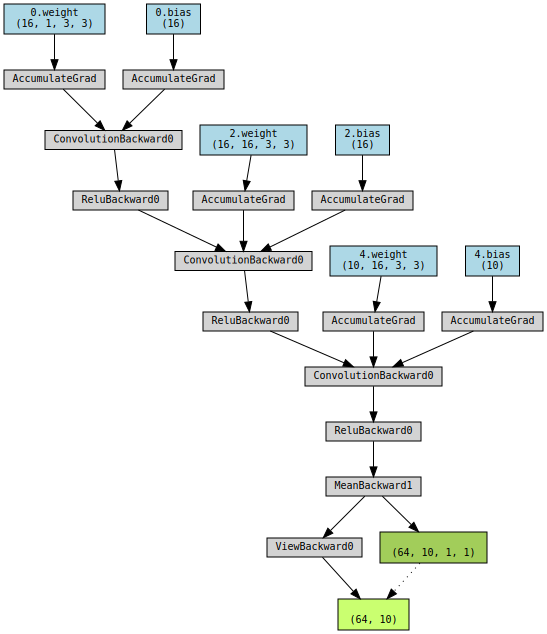

모든 데이터셋 학습 횟수(epoch) : 0 일때, 손실(loss) : 0.3617956848144531
모든 데이터셋 학습 횟수(epoch) : 1 일때, 손실(loss) : 0.3784541136264801


In [ ]:
import requests
import pickle
import gzip
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

# 데이터 경로 설정 및 다운로드
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 배치 사이즈, 학습률, 에폭 설정
bs = 64
lr = 0.1
epochs = 2
loss_func = F.cross_entropy

# 데이터셋 생성
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)

#사용자 정의 레이어 생성
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

#--------  리팩토링1 (start)  --------#
# 데이터 전처리 함수
def preprocess(x, y):
    return x.view(-1, 1, 28, 28), y

# 데이터 로더를 래핑하는 클래스
class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        for b in self.dl:
            yield (self.func(*b))
#--------  리팩토링1 (end)  --------#

# 데이터 로더 생성 함수
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

# 손실 계산 함수
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    return loss.item(), len(xb)

# 모델 학습 함수
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
      model.train()
      for xb, yb in train_dl:
          loss_batch(model, loss_func, xb, yb, opt)
      model.eval()
      with torch.no_grad():
          losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
          )
      val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
      print("모든 데이터셋 학습 횟수(epoch) :",epoch, "일때, 손실(loss) :", val_loss)

#--------  리팩토링2 (start)  --------#
# 데이터 로더 준비
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

# 모델 정의
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

# 옵티마이저 정의
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
#--------  리팩토링2 (end)  --------#

# **모델 요약(torchsummary)
from torchsummary import summary

print("Model Summary:")
summary(model, input_size=(1, 28, 28), device="cpu")

# **모델 시각화
from torchviz import make_dot

xb, yb = next(iter(train_dl))
out = model(xb)
#make_dot(out, params=dict(list(model.named_parameters()))).render("model11_gpu", format="png")
dot = make_dot(out, params=dict(list(model.named_parameters())))
display(dot)

# 모델 학습
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

## GPU 사용하기

> #### **GPU 사용**
> - **주요 라이브러리**: torch.cuda
> - **특징**: CUDA 지원 GPU를 활용하여 모델 학습.
> - **개선 사항**: 학습 속도 향상, 대규모 데이터 처리 가능

> 만약 여러분들이 운이 좋아서 CUDA 지원 GPU (대부분의 클라우드 제공 업체에서
시간당 약 $0.50 에 이용할 수 있습니다) 를 사용할 수 있다면, 코드 실행 속도를 높일 수 있습니다.
- 먼저 GPU가 PyTorch에서 작동하는지 확인합니다:

```
print(torch.cuda.is_available())
```



Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 14, 14]             160
              ReLU-2           [-1, 16, 14, 14]               0
            Conv2d-3             [-1, 16, 7, 7]           2,320
              ReLU-4             [-1, 16, 7, 7]               0
            Conv2d-5             [-1, 10, 4, 4]           1,450
              ReLU-6             [-1, 10, 4, 4]               0
 AdaptiveAvgPool2d-7             [-1, 10, 1, 1]               0
            Lambda-8                   [-1, 10]               0
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.01
Estimated Total Size (MB): 0.08
----------------------------------------------------------------


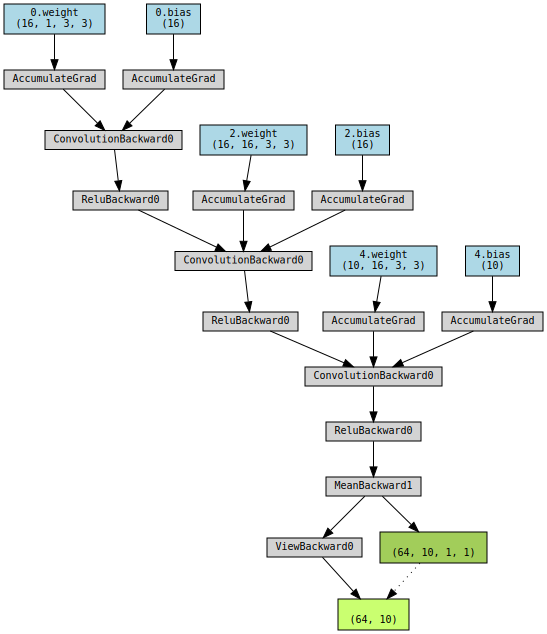

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


모든 데이터셋 학습 횟수(epoch) : 0 일때, 손실(loss) : 0.3689195967912674
모든 데이터셋 학습 횟수(epoch) : 1 일때, 손실(loss) : 0.24596221599578857


In [ ]:
import requests
import pickle
import gzip
import numpy as np
import math
from pathlib import Path
from matplotlib import pyplot as plt

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

#--------  리팩토링1 (start)  --------#
# 디바이스 오브젝트를 생성
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")
#--------  리팩토링1 (end)  --------#

# 데이터 다운로드 및 압축 해제
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"
PATH.mkdir(parents=True, exist_ok=True)
URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

# 데이터셋 로드 및 텐서로 변환
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

# 배치 사이즈, 학습률, 에폭 설정
bs = 64
lr = 0.1
epochs = 2
loss_func = F.cross_entropy

# 데이터셋 생성
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)

#사용자 정의 레이어 생성
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

# 데이터 로더를 래핑하는 클래스
class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        for b in self.dl:
            yield (self.func(*b))

# 데이터 로더 생성 함수
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

# 손실 계산 함수
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    return loss.item(), len(xb)

# 모델 학습 함수
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
      model.train()
      for xb, yb in train_dl:
          loss_batch(model, loss_func, xb, yb, opt)
      model.eval()
      with torch.no_grad():
          losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
          )
      val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
      print("모든 데이터셋 학습 횟수(epoch) :",epoch, "일때, 손실(loss) :", val_loss)

#--------  리팩토링2 (start)  --------#
# GPU로 배치를 옮기도록 preprocess 를 업데이트
def preprocess(x, y):
    return x.view(-1, 1, 28, 28).to(dev), y.to(dev)

# 데이터 로더 준비
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)
#--------  리팩토링2 (end)  --------#

# 모델 정의
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

#--------  리팩토링3 (start)  --------#
# 모델을 GPU로 이동
model.to(dev)

# 옵티마이저 정의
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
#--------  리팩토링3 (start)  --------#

# **모델 요약(torchsummary)
from torchsummary import summary

print("Model Summary:")
summary(model, input_size=(1, 28, 28), device="cuda")

# **모델 시각화
from torchviz import make_dot

xb, yb = next(iter(train_dl))
out = model(xb)
#make_dot(out, params=dict(list(model.named_parameters()))).render("model11_gpu", format="png")
dot = make_dot(out, params=dict(list(model.named_parameters())))
display(dot)

# 모델 학습
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

## 참고 레퍼런스

- 파이토치 가이드 : https://tutorials.pytorch.kr/beginner/nn_tutorial.html#nn-sequential
- 모델 정보요약 및 시각화 : https://gaussian37.github.io/dl-pytorch-observe/